In [ ]:
# TASK 1
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("sample_data1.xlsx")


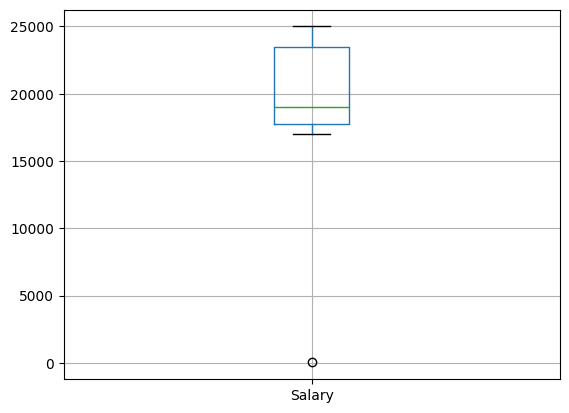

In [10]:
df.boxplot(column='Salary')
plt.show()


In [12]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
df_outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
df_outliers


,Serial Number,Title,Salary,Qualification,Exp
7,8,UX/UI Developer,23.0,Bachelors,0


In [16]:
df_no_outliers = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
df_no_outliers

,Serial Number,Title,Salary,Qualification,Exp
0,1,Software Engineer,20000.0,Bachelors,3
1,2,Data Scientist,23000.0,Masters,4
2,3,Project Manager,18000.0,Masters,2
3,4,Professor,25000.0,Bachelors,5
4,5,Database Architect,17000.0,Bachelors,1
5,4,Professor,25000.0,Bachelors,5
6,7,Business Analyst,18000.0,NaN,5


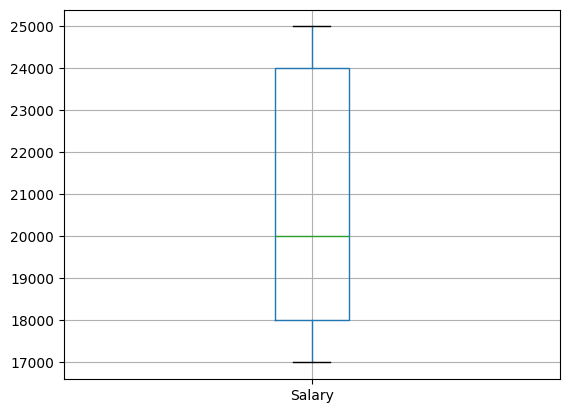

In [ ]:
df_no_outliers.boxplot(column='Salary')
plt.show()

In [20]:
# TASK 2
import seaborn as sns
import numpy as np
numeric_cols = df_no_outliers.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()


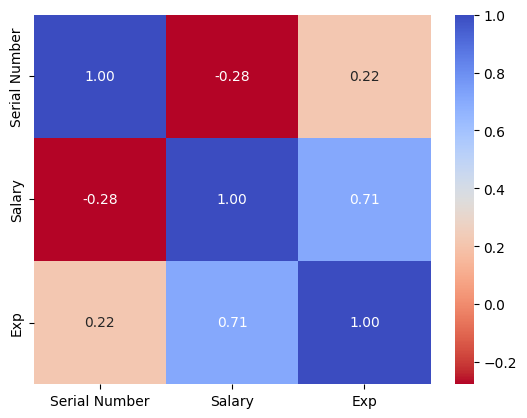

In [21]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1 = numeric_cols.copy()


In [25]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

In [26]:
vif_data = pd.DataFrame()
vif_data['Feature'] = df1.columns
vif_data['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

In [ ]:
vif_data

,Feature,VIF
0,Serial Number,4.323912
1,Salary,11.881207
2,Exp,11.537716
